<a href="https://colab.research.google.com/github/srikaranreddy13/Data-Science/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
print("Data info:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Data info: None


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missimg_percentage':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_count',ascending=False)


,missing_count,missimg_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [ ]:
missing.sort_values(by='missimg_percentage',ascending=False)

,missing_count,missimg_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [ ]:
# filling missimg values
df['age']=df['age'].fillna((df['age'].mean()))
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.drop(columns=['deck'],inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.isnull().sum().sum()

np.int64(2)

In [ ]:

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missimg_percentage':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_count',ascending=False)


,missing_count,missimg_percentage
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [ ]:
print("duplicated rows",df.duplicated().sum())
# covert datatypes
df['class']=df['class'].astype('category')
df
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()

duplicated rows 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


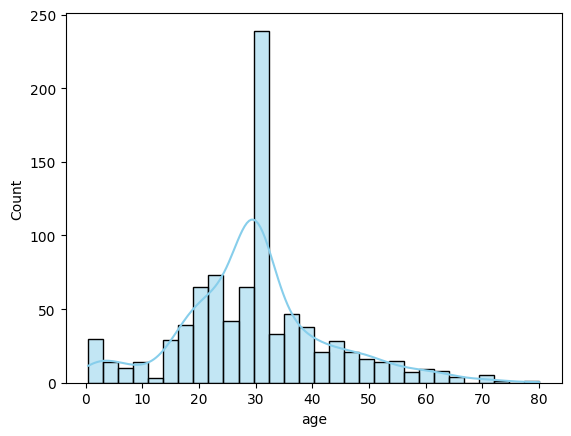

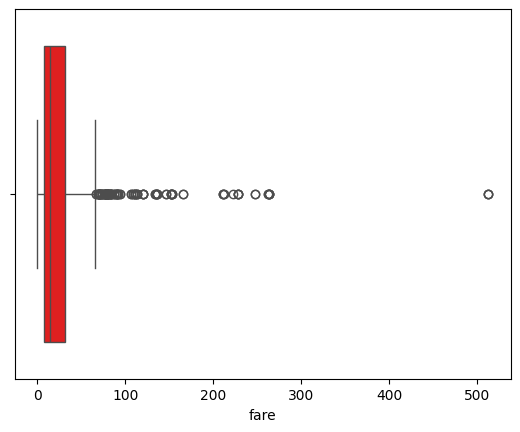

In [ ]:
# univariate analysis
num_cols=df.select_dtypes(include=np.number).columns
df[num_cols].describe()
# histogram
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.show()
# boxplot
sns.boxplot(x=df['fare'],color='red')
plt.show()

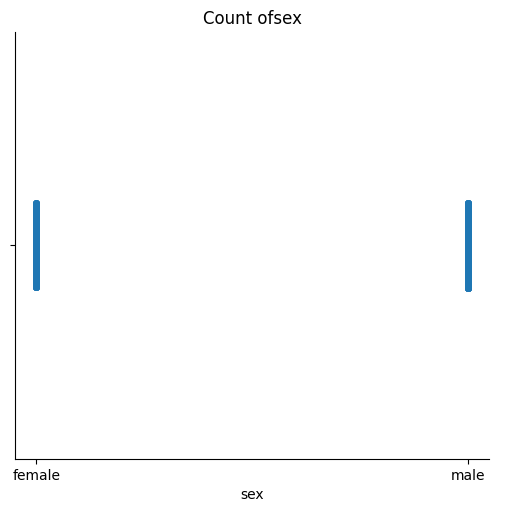

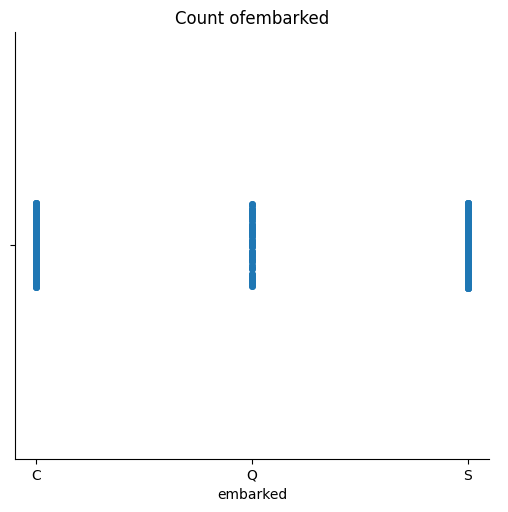

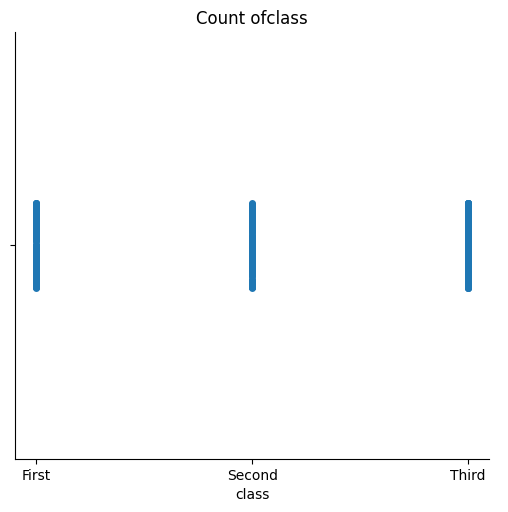

In [ ]:
# univariate on categries
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
  sns.catplot(x=col,data=df)
  plt.title(f"Count of{col}")
  plt.show()


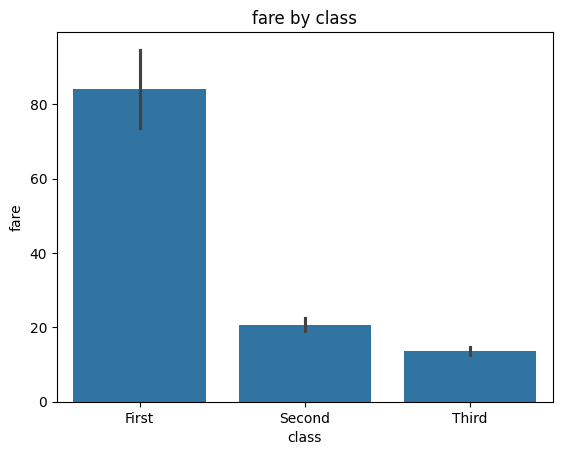

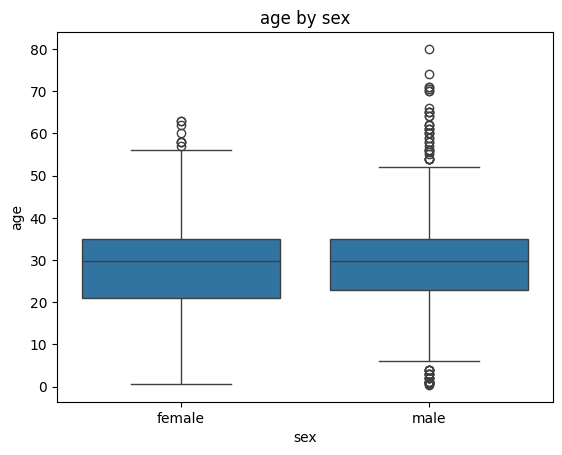

In [ ]:





# bivariate analysis-numerical vs categorical
sns.barplot(x='class',y='fare',data=df)
plt.title("fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("age by sex")
plt.show()


















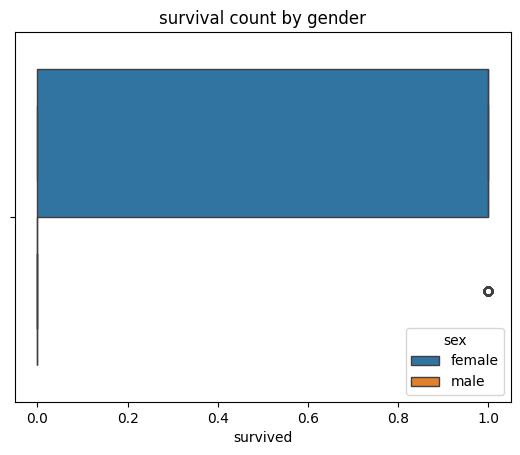

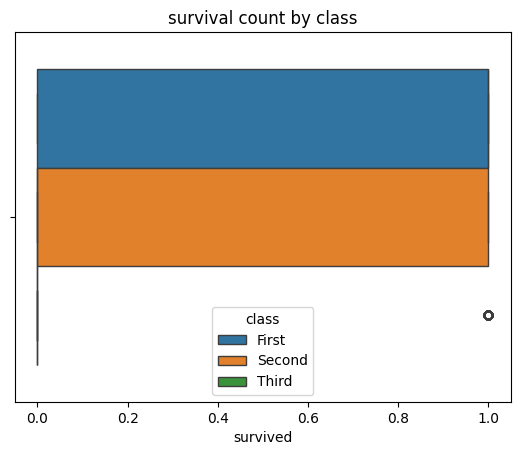

In [ ]:
# categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class")
plt.show()

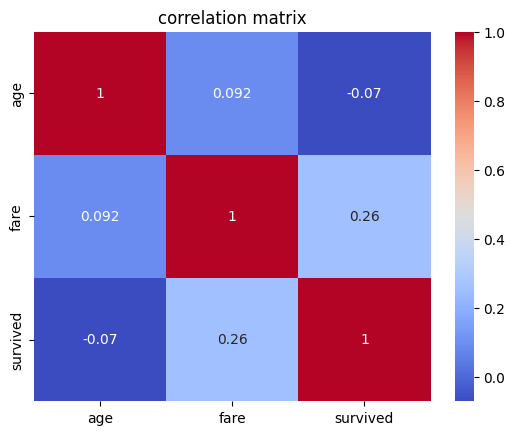

In [ ]:
# multivaraiate
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

In [ ]:
# outlier detection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['fare']<lower_bound) | (df['fare']>upper_bound)]
print("no.of outliers in fare:",len(outliers))


no.of outliers in fare: 116


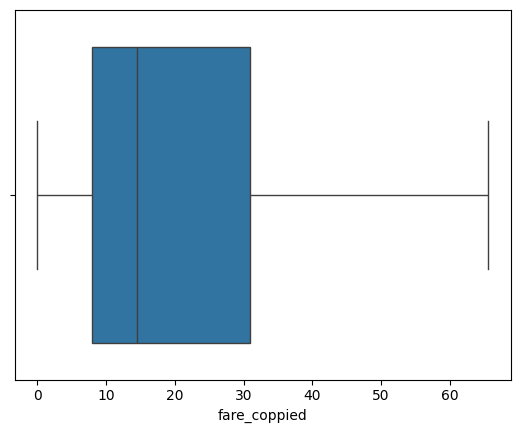

In [ ]:
# outliers
df['fare_coppied']=df['fare'].clip(lower=lower_bound,upper=upper_bound)
sns.boxplot(x=df['fare_coppied'])
plt.show()

In [ ]:
# merge the diff files
